Assignment from https://cjtu.github.io/spirl/f21_a1.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import astropy.constants as const


def planck(wvl_nm, temp):
    # get constant value from astropy.constant and strip units
    h = const.h.value
    c = const.c.value
    k = const.k_B.value
    # convert wavelength to metre scale
    wvl = wvl_nm * 1e-9
    # compute power intensity
    return (2 * np.pi * h * c ** 2) / (wvl ** 5) * (
            1 / (np.exp(h * c / (wvl * k * temp)) - 1))


# testing output
planck(wvl_nm=10, temp=5000)

4.004106181584773e-101

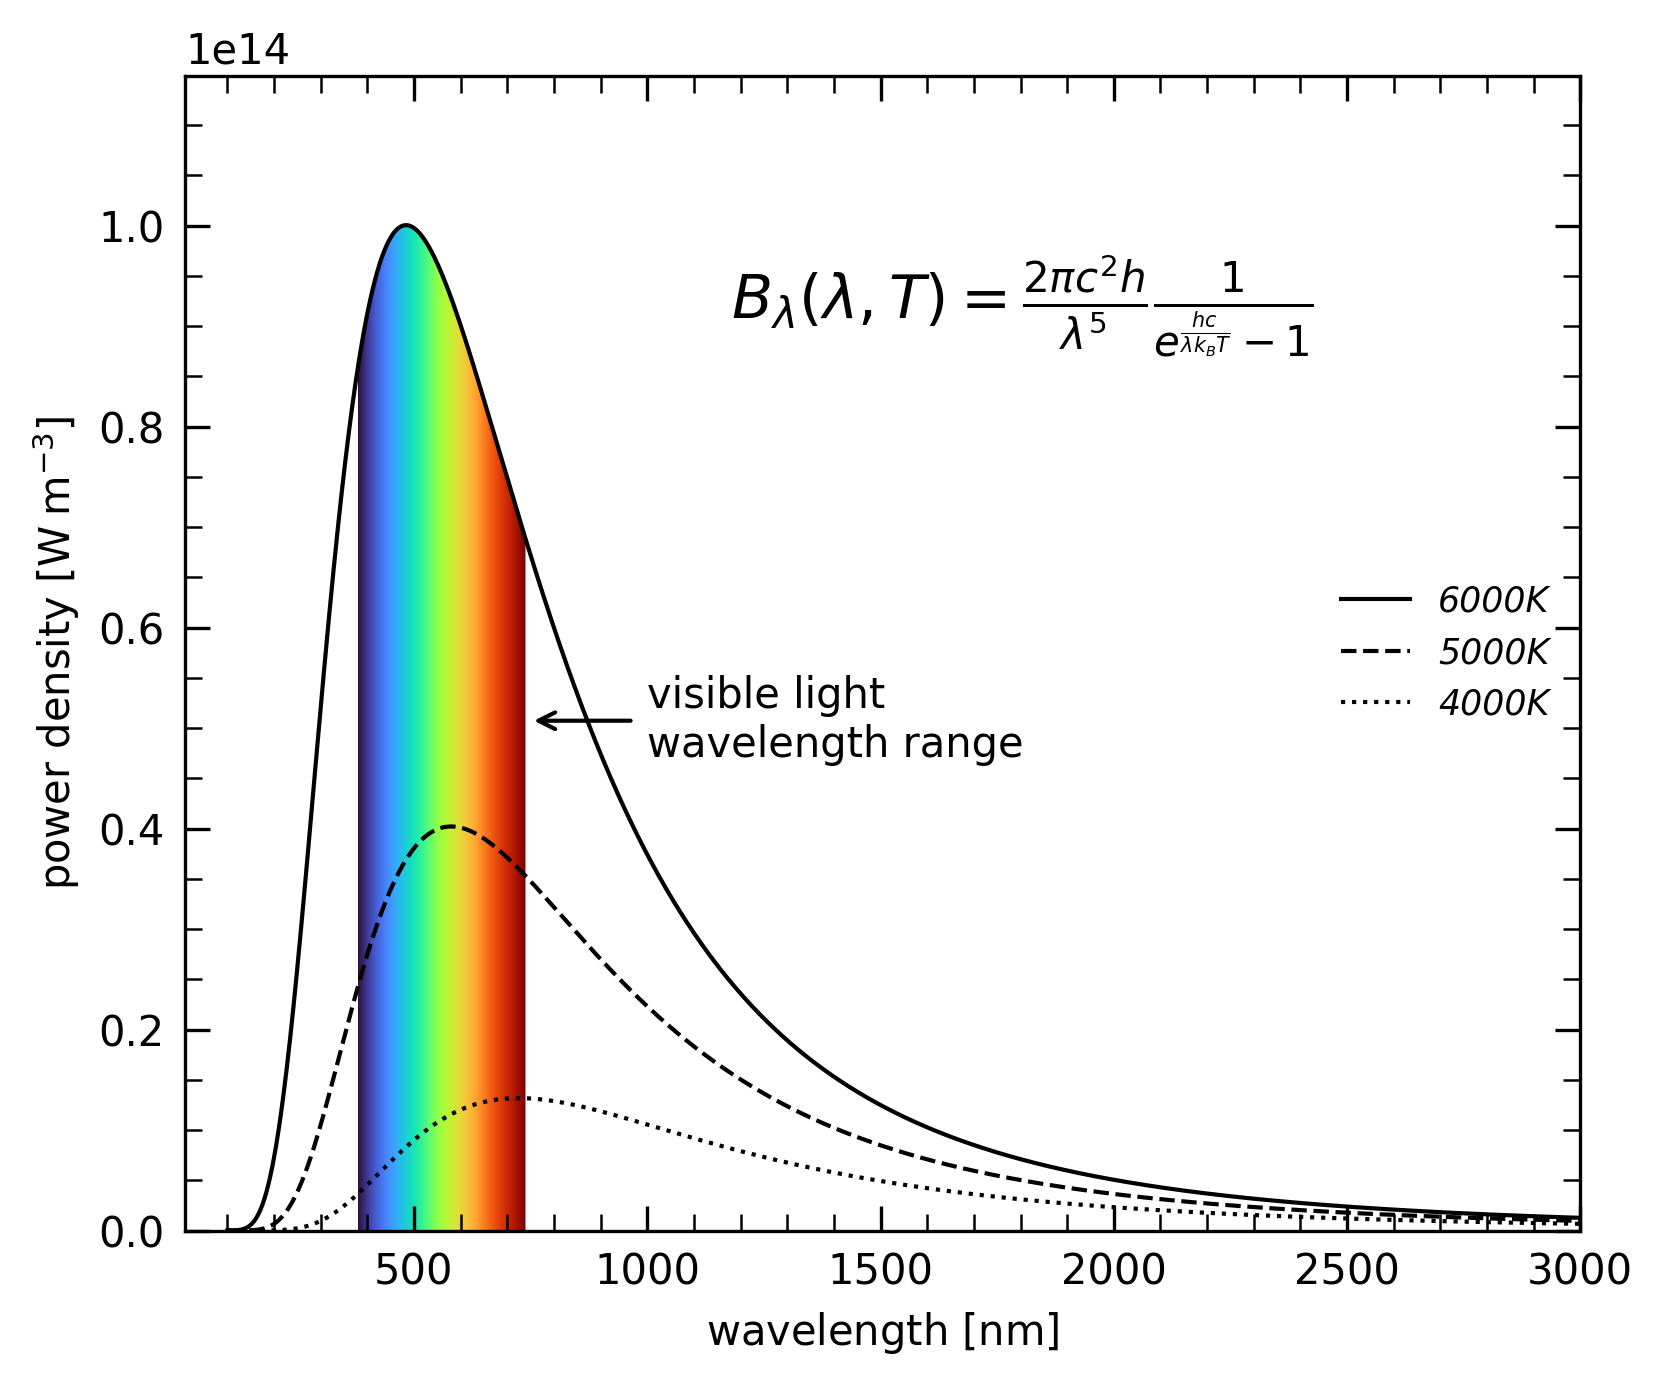

In [3]:
# initialise figure and sub axes
fig, axis = plt.subplots(1, 1, figsize=(6, 5),
                         facecolor='white', dpi=300,
                         gridspec_kw={'hspace': .15, 'wspace': .08})

wvl_range = np.arange(100, 3000, 1)
wvl_visible = np.arange(380, 740, 1)

# the colour of the plotted objects can be assigned by name
axis.plot(wvl_range, planck(wvl_nm=wvl_range, temp=6000),
          label='6000K', ls='-', lw=1, c='black')
# or by abbreviation (e.g., 'k' for 'black', 'b' for 'blue')
axis.plot(wvl_range, planck(wvl_nm=wvl_range, temp=5000),
          label='5000K', ls='--', lw=1, c='k')
# or by hex code
axis.plot(wvl_range, planck(wvl_nm=wvl_range, temp=4000),
          label='4000K', ls=':', lw=1, c='#000000')

# mark visible light wavelength region (optional)
polygon = plt.fill_between(x=wvl_visible, y1=0,
                           y2=planck(wvl_nm=wvl_visible, temp=6000),
                           color='None', alpha=0.8)
vertices = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = plt.imshow(np.linspace(0, 1, 256).reshape(1, -1),
                      cmap='turbo', aspect='auto',
                      extent=[vertices[:, 0].min(), vertices[:, 0].max(),
                              vertices[:, 1].min(), vertices[:, 1].max()])
gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData)

# annotation
axis.annotate('visible light\nwavelength range',
              xy=(max(wvl_visible), planck(max(wvl_visible), 5500)),
              xytext=(1000, planck(max(wvl_visible), 5500)),
              size='medium', style='normal', family='sans-serif',
              verticalalignment='center',
              horizontalalignment='left',
              arrowprops={'arrowstyle': '->'})
axis.text(.6, .8,
          r'$B_{\lambda}(\lambda,T)=\frac{2\pi c^2h}{\lambda^5} '
          r'\frac{1}{e^{\frac{hc}{\lambda k_{B} T}}-1}$',
          size='x-large', style='normal', family='sans-serif',
          verticalalignment='center',
          horizontalalignment='center',
          transform=axis.transAxes)

# axis attributes
axis.set_xlabel(r'wavelength [$\mathrm{nm}$]',
                size='medium', style='normal', family='sans-serif')
axis.set_ylabel(r'power density [$\mathrm{W\:m}^{-3}$]',
                size='medium', style='normal', family='sans-serif')

axis.minorticks_on()
axis.tick_params(axis='both', right=True, top=True, pad=5,
                 direction='in', length=6, which='major')
axis.tick_params(axis='both', right=True, top=True, pad=5,
                 direction='in', length=4, which='minor')
axis.set_xlim(10, 3000)
axis.set_ylim(0, 10.1 ** 14)

# legend
axis.legend(loc='center right', prop={'family': 'sans-serif',
                                      'style': 'italic',
                                      'size': 'small'},
            markerscale=1.2, ncols=1,
            frameon=False)